# Challenge: Airline Arrivals

Use this [dataset](http://stat-computing.org/dataexpo/2009/the-data.html) of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

The data comes originally from RITA.

It consists of the following variables:

1.	Year	1987-2008
2.	Month	1-12
3.	DayofMonth	1-31
4.	DayOfWeek	1 (Monday) - 7 (Sunday)
5.	DepTime	actual departure time (local, hhmm)
6.	CRSDepTime	scheduled departure time (local, hhmm)
7.	ArrTime	actual arrival time (local, hhmm)
8.	CRSArrTime	scheduled arrival time (local, hhmm)
9.	UniqueCarrier	unique carrier code
10.	FlightNum	flight number
11.	TailNum	plane tail number
12.	ActualElapsedTime	in minutes
13.	CRSElapsedTime	in minutes
14.	AirTime	in minutes
15.	ArrDelay	arrival delay, in minutes
16.	DepDelay	departure delay, in minutes
17.	Origin	origin IATA airport code
18.	Dest	destination IATA airport code
19.	Distance	in miles
20.	TaxiIn	taxi in time, in minutes
21.	TaxiOut	taxi out time in minutes
22.	Cancelled	was the flight cancelled?
23.	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	Diverted	1 = yes, 0 = no
25.	CarrierDelay	in minutes
26.	WeatherDelay	in minutes
27.	NASDelay	in minutes
28.	SecurityDelay	in minutes
29.	LateAircraftDelay	in minutes

## Exploring the data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
airlines_full = pd.read_csv('2008.csv.bz2')
#Download data to DataFrame
pd.set_option('display.max_columns', None)
airlines_full.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [3]:
airlines_full.shape

(7009728, 29)

In [4]:
airlines_full.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
airlines_full.info

<bound method DataFrame.info of          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2008      1           3          4   2003.0        1955   2211.0   
1        2008      1           3          4    754.0         735   1002.0   
2        2008      1           3          4    628.0         620    804.0   
3        2008      1           3          4    926.0         930   1054.0   
4        2008      1           3          4   1829.0        1755   1959.0   
...       ...    ...         ...        ...      ...         ...      ...   
7009723  2008     12          13          6   1002.0         959   1204.0   
7009724  2008     12          13          6    834.0         835   1021.0   
7009725  2008     12          13          6    655.0         700    856.0   
7009726  2008     12          13          6   1251.0        1240   1446.0   
7009727  2008     12          13          6   1110.0        1103   1413.0   

         CRSArrTime UniqueCarrier  FlightNu

In [6]:
#Number of non-NA values
airlines_full.count()

Year                 7009728
Month                7009728
DayofMonth           7009728
DayOfWeek            7009728
DepTime              6873482
CRSDepTime           7009728
ArrTime              6858079
CRSArrTime           7009728
UniqueCarrier        7009728
FlightNum            7009728
TailNum              6926363
ActualElapsedTime    6855029
CRSElapsedTime       7008884
AirTime              6855029
ArrDelay             6855029
DepDelay             6873482
Origin               7009728
Dest                 7009728
Distance             7009728
TaxiIn               6858079
TaxiOut              6872670
Cancelled            7009728
CancellationCode      137434
Diverted             7009728
CarrierDelay         1524735
WeatherDelay         1524735
NASDelay             1524735
SecurityDelay        1524735
LateAircraftDelay    1524735
dtype: int64

In [7]:
airlines_full.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [8]:
abs(airlines_full['ArrDelay'])

0          14.0
1           2.0
2          14.0
3           6.0
4          34.0
           ... 
7009723    14.0
7009724     2.0
7009725     0.0
7009726     9.0
7009727     5.0
Name: ArrDelay, Length: 7009728, dtype: float64

In [9]:
airlines_full.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


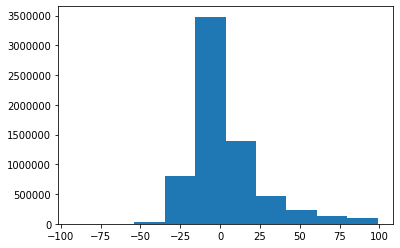

In [10]:
# Histogram - note the cut-off of extreme values on both sides
plt.hist(airlines_full.loc[(abs(airlines_full['ArrDelay'])<100), 'ArrDelay'].dropna())
plt.show()

Note the bulk of flights actually land a couple of minutes early!

- Mean for full sample: 8.16
- Median for full sample: -2.0

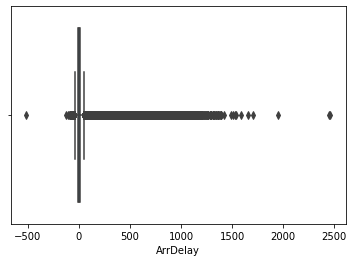

In [11]:
# Boxplot to look at outliers
sns.boxplot(airlines_full['ArrDelay'])
plt.show()

In [12]:
airlines_full.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [13]:
airlines_full.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


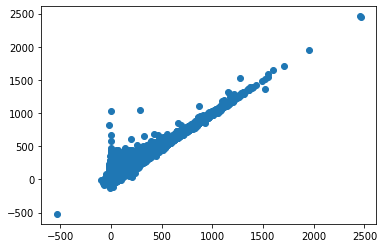

In [14]:
# DepDelay and ArrDelay are pretty much the same thing
plt.scatter(airlines_full['DepDelay'], airlines_full['ArrDelay'])
plt.show()

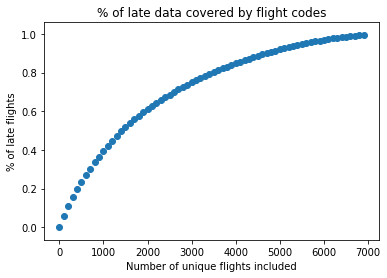

In [15]:
# Looking for a trade-off between number of flight codes (eventually the dummy variables) 
# and number of late flights covered 

# Count flight codes for all late flights (sorted descending)
flightnums = airlines_full.loc[airlines_full['ArrDelay']>30, 'FlightNum'].value_counts()

lateflights = []

numberofflightcodes = []

# Calculate coverage of late flights by top i flight codes
for i in range(0, 7000,100):
    lateflights.append(flightnums[0:i].sum()/flightnums.sum())
    numberofflightcodes.append(i)

plt.scatter(y=lateflights, x=numberofflightcodes)
plt.title('% of late data covered by flight codes')
plt.ylabel('% of late flights')
plt.xlabel('Number of unique flights included')
plt.show()

    

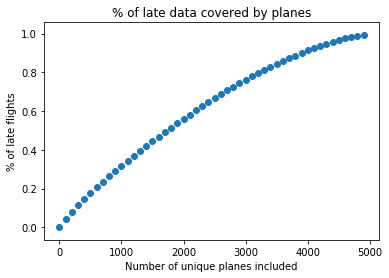

In [16]:
# Trade-off between TailNums and late flights

# Count flight codes for all late flights (sorted descending)
tailnums = airlines_full.loc[airlines_full['ArrDelay']>30, 'TailNum'].value_counts()

lateplane = []

numberoffplanes = []

# Calculate coverage of late flights by top i flight codes
for i in range(0, 5000,100):
    lateplane.append(tailnums[0:i].sum()/tailnums.sum())
    numberoffplanes.append(i)

plt.scatter(y=lateplane, x=numberoffplanes)
plt.title('% of late data covered by planes')
plt.ylabel('% of late flights')
plt.xlabel('Number of unique planes included')
plt.show()

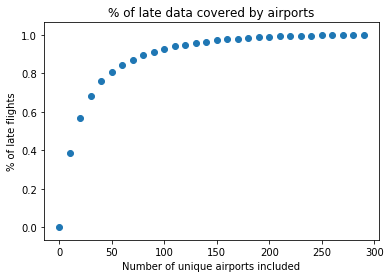

In [17]:
# Trade-off between origin airport and late flights

# Count airports for all late flights (sorted descending)
origin = airlines_full.loc[airlines_full['ArrDelay']>30, 'Origin'].value_counts()

lateplane = []

numberofairports = []

# Calculate coverage of late flights by top i flight codes
for i in range(0, 300,10):
    lateplane.append(origin[0:i].sum()/origin.sum())
    numberofairports.append(i)

plt.scatter(y=lateplane, x=numberofairports)
plt.title('% of late data covered by airports')
plt.ylabel('% of late flights')
plt.xlabel('Number of unique airports included')
plt.show()

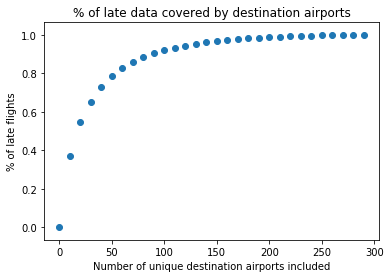

In [18]:
# Trade-off between destination airport and late flights

# Count airports for all late flights (sorted descending)
destination = airlines_full.loc[airlines_full['ArrDelay']>30, 'Dest'].value_counts()

lateplane = []

numberofairports = []

# Calculate coverage of late flights by top i flight codes
for i in range(0, 300,10):
    lateplane.append(destination[0:i].sum()/destination.sum())
    numberofairports.append(i)

plt.scatter(y=lateplane, x=numberofairports)
plt.title('% of late data covered by destination airports')
plt.ylabel('% of late flights')
plt.xlabel('Number of unique destination airports included')
plt.show()

## Making a smaller database

Unfortunately the size of the database is too big to run some of the models on my local. I there have to make the database smaller, even after dropping NaN of ArrDelay (mainly due to cancelled flights which don't have an ArrDelay observation) . Below I randomly select 500,000 samples (no replacement).

In [19]:
# Reduce sample to 20,000 to speed up calculation (avoid MemoryError)
airlines = airlines_full.sample(20000, replace=False)

In [20]:
# Dropping the negative outliers in ArrDelay (60 minutes or earlier), 343 dropped + ALL NaN
airlines = airlines.loc[airlines_full['ArrDelay']>-60,:]

# Dropping all flights later than a day (1440 minutes)
airlines = airlines.loc[airlines_full['ArrDelay']<1440,:]



In [21]:
airlines.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5590455,2008,10,5,7,1449.0,1452,2250.0,2302,UA,294,N827UA,301.0,310.0,282.0,-12.0,-3.0,SFO,BWI,2457,4.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5046796,2008,9,8,1,1054.0,1053,1246.0,1235,UA,344,N332UA,112.0,102.0,79.0,11.0,1.0,SFO,PDX,550,5.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
71525,2008,1,25,5,1054.0,1100,1314.0,1325,WN,3395,N611SW,80.0,85.0,63.0,-11.0,-6.0,BNA,CLE,448,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1130850,2008,2,24,7,827.0,810,1124.0,1120,B6,864,N193JB,177.0,190.0,155.0,4.0,17.0,RSW,BOS,1249,3.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
547544,2008,1,3,4,1421.0,1410,1551.0,1544,B6,1031,N178JB,90.0,94.0,67.0,7.0,11.0,BUF,JFK,301,11.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [22]:
airlines.shape

(19590, 29)

In [23]:
airlines.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [24]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19590 entries, 5590455 to 6627073
Data columns (total 29 columns):
Year                 19590 non-null int64
Month                19590 non-null int64
DayofMonth           19590 non-null int64
DayOfWeek            19590 non-null int64
DepTime              19590 non-null float64
CRSDepTime           19590 non-null int64
ArrTime              19590 non-null float64
CRSArrTime           19590 non-null int64
UniqueCarrier        19590 non-null object
FlightNum            19590 non-null int64
TailNum              19590 non-null object
ActualElapsedTime    19590 non-null float64
CRSElapsedTime       19590 non-null float64
AirTime              19590 non-null float64
ArrDelay             19590 non-null float64
DepDelay             19590 non-null float64
Origin               19590 non-null object
Dest                 19590 non-null object
Distance             19590 non-null int64
TaxiIn               19590 non-null float64
TaxiOut              19

## Getting the data ready for modeling

In [25]:
from sklearn import preprocessing

# Set departure time to minutes
timestring = airlines.CRSDepTime.astype('str')
# Change hhmm to string to split to hh and mm, and then convert to minutes
hours = timestring.apply(lambda x: x[:2]).astype('int')
minutes = timestring.apply(lambda x: x[-2:]).astype('int')
airlines['DepartureTime'] = hours*60+minutes
airlines.DepartureTime.value_counts()

# Drop columns which aren't used int the model
airlines.drop(['Year', 'DayofMonth', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime','FlightNum', 'TailNum',
               'ActualElapsedTime', 'CRSElapsedTime','AirTime', 'DepDelay', 'TaxiIn',
               'TaxiOut', 'Cancelled', 'CancellationCode', 'CarrierDelay',
               'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
               inplace=True, axis=1)

# Set dtype to categorical
for col in ['Month', 'DayOfWeek','UniqueCarrier', 'Origin', 'Dest']:
    airlines[col] = airlines[col].astype('category')
    
# Copy into a df to use pd.get_dummies
fordummies = airlines.loc[:, ['Month', 'DayOfWeek','UniqueCarrier', 'Origin', 'Dest']]
    
# Get top 10 origin and late dummies (based on most late flights)
# Top 50 is a better cut-off point, but it adds too much complexity
latecount = airlines.loc[airlines['ArrDelay']>30, 'Origin'].value_counts()
originpd = list(latecount.index.astype('str')[0:51])
latecountD = airlines.loc[airlines['ArrDelay']>30, 'Dest'].value_counts()
destpd = list(latecountD.index.astype('str')[0:51])

# Get top 5 airlines
#airlinecount = airlines.loc[airlines['ArrDelay']>30, 'UniqueCarrier'].value_counts()
#topairlines = list(latecount.index.astype('str')[0:16])

# Top 50 origin and destination airports
fordummies['Origin_new'] = fordummies.Origin.where(fordummies.Origin.isin(originpd), 'other')
fordummies['Dest_new'] = fordummies.Dest.where(fordummies.Dest.isin(destpd), 'other')
#fordummies['Airline_new'] = fordummies.UniqueCarrier.where(fordummies.UniqueCarrier.isin(topairlines), 'other')


# Drop old Origin and Dest
fordummies.drop(['Origin', 'Dest'], axis=1, inplace=True)

# Make some dummies
dummies = pd.get_dummies(fordummies)

# Join dummies to airlines and drop original categories (and ArrDelay)
airlines.drop(['Month', 'DayOfWeek',
               'UniqueCarrier', 'Origin', 'Dest'], inplace=True, axis=1)

X = pd.concat([airlines, dummies], axis=1)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.


In [26]:
X.head()

,ArrDelay,Distance,Diverted,DepartureTime,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_new_ATL,Origin_new_AUS,Origin_new_BNA,Origin_new_BOS,Origin_new_BWI,Origin_new_CAE,Origin_new_CLE,Origin_new_CLT,Origin_new_CMH,Origin_new_CVG,Origin_new_DAL,Origin_new_DCA,Origin_new_DEN,Origin_new_DFW,Origin_new_DTW,Origin_new_EWR,Origin_new_FLL,Origin_new_HNL,Origin_new_HOU,Origin_new_IAD,Origin_new_IAH,Origin_new_IND,Origin_new_JFK,Origin_new_LAS,Origin_new_LAX,Origin_new_LGA,Origin_new_MCI,Origin_new_MCO,Origin_new_MDW,Origin_new_MEM,Origin_new_MIA,Origin_new_MKE,Origin_new_MSP,Origin_new_ONT,Origin_new_ORD,Origin_new_PBI,Origin_new_PDX,Origin_new_PHL,Origin_new_PHX,Origin_new_PIT,Origin_new_RDU,Origin_new_SAN,Origin_new_SAT,Origin_new_SEA,Origin_new_SFO,Origin_new_SJC,Origin_new_SJU,Origin_new_SLC,Origin_new_SNA,Origin_new_STL,Origin_new_TPA,Origin_new_other,Dest_new_ABQ,Dest_new_ATL,Dest_new_AUS,Dest_new_BNA,Dest_new_BOS,Dest_new_BWI,Dest_new_CLE,Dest_new_CLT,Dest_new_CVG,Dest_new_DAL,Dest_new_DCA,Dest_new_DEN,Dest_new_DFW,Dest_new_DTW,Dest_new_EWR,Dest_new_FLL,Dest_new_HOU,Dest_new_IAD,Dest_new_IAH,Dest_new_IND,Dest_new_JFK,Dest_new_LAS,Dest_new_LAX,Dest_new_LGA,Dest_new_MCI,Dest_new_MCO,Dest_new_MDW,Dest_new_MEM,Dest_new_MHT,Dest_new_MIA,Dest_new_MKE,Dest_new_MSP,Dest_new_MSY,Dest_new_OAK,Dest_new_OMA,Dest_new_ORD,Dest_new_PDX,Dest_new_PHL,Dest_new_PHX,Dest_new_RDU,Dest_new_RSW,Dest_new_SAN,Dest_new_SAT,Dest_new_SEA,Dest_new_SFO,Dest_new_SJC,Dest_new_SJU,Dest_new_SLC,Dest_new_SMF,Dest_new_STL,Dest_new_TPA,Dest_new_other
5590455,-12.0,2457,0,892,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5046796,11.0,550,0,653,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71525,-11.0,448,0,660,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1130850,4.0,1249,0,4870,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
547544,7.0,301,0,850,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
X.shape

(19590, 147)

In [28]:
for col in X.columns:
    print(col)

ArrDelay
Distance
Diverted
DepartureTime
Month_1
Month_2
Month_3
Month_4
Month_5
Month_6
Month_7
Month_8
Month_9
Month_10
Month_11
Month_12
DayOfWeek_1
DayOfWeek_2
DayOfWeek_3
DayOfWeek_4
DayOfWeek_5
DayOfWeek_6
DayOfWeek_7
UniqueCarrier_9E
UniqueCarrier_AA
UniqueCarrier_AQ
UniqueCarrier_AS
UniqueCarrier_B6
UniqueCarrier_CO
UniqueCarrier_DL
UniqueCarrier_EV
UniqueCarrier_F9
UniqueCarrier_FL
UniqueCarrier_HA
UniqueCarrier_MQ
UniqueCarrier_NW
UniqueCarrier_OH
UniqueCarrier_OO
UniqueCarrier_UA
UniqueCarrier_US
UniqueCarrier_WN
UniqueCarrier_XE
UniqueCarrier_YV
Origin_new_ATL
Origin_new_AUS
Origin_new_BNA
Origin_new_BOS
Origin_new_BWI
Origin_new_CAE
Origin_new_CLE
Origin_new_CLT
Origin_new_CMH
Origin_new_CVG
Origin_new_DAL
Origin_new_DCA
Origin_new_DEN
Origin_new_DFW
Origin_new_DTW
Origin_new_EWR
Origin_new_FLL
Origin_new_HNL
Origin_new_HOU
Origin_new_IAD
Origin_new_IAH
Origin_new_IND
Origin_new_JFK
Origin_new_LAS
Origin_new_LAX
Origin_new_LGA
Origin_new_MCI
Origin_new_MCO
Origin_new_MDW
O

In [29]:
corrs = X.corr()
print(corrs)


                ArrDelay  Distance  Diverted  DepartureTime   Month_1  \
ArrDelay        1.000000  0.020994       NaN      -0.081678  0.016043   
Distance        0.020994  1.000000       NaN       0.024763  0.005148   
Diverted             NaN       NaN       NaN            NaN       NaN   
DepartureTime  -0.081678  0.024763       NaN       1.000000 -0.006532   
Month_1         0.016043  0.005148       NaN      -0.006532  1.000000   
...                  ...       ...       ...            ...       ...   
Dest_new_SLC   -0.014377 -0.014572       NaN      -0.000591  0.003218   
Dest_new_SMF   -0.001122 -0.004334       NaN      -0.002981 -0.007235   
Dest_new_STL   -0.013999 -0.007888       NaN      -0.002806  0.003205   
Dest_new_TPA   -0.014770  0.017380       NaN      -0.004175 -0.001576   
Dest_new_other -0.029485 -0.185014       NaN      -0.032865 -0.005134   

                 Month_2   Month_3   Month_4   Month_5   Month_6   Month_7  \
ArrDelay        0.042830  0.018305 -0.006691 

In [30]:
# Check and drop NaN in X
X.dropna(inplace=True)

# Scaling X (standard scalar)
X_scaled = X.copy()
print(X_scaled.Distance.mean())
print(X_scaled.ArrDelay.mean())
X_scaled.loc[:,['Distance', 'ArrDelay', 'DepartureTime']]=preprocessing.scale(X.loc[:, ['Distance', 'ArrDelay', 'DepartureTime']])
print(X_scaled.Distance.mean())
print(X_scaled.ArrDelay.mean())

# Set y and drop from X
y_scaled = X_scaled['ArrDelay']
X_scaled.drop(['ArrDelay'], axis=1, inplace=True)


# Set y and drop from X
y = X['ArrDelay']
X.drop(['ArrDelay'], axis=1, inplace=True)



723.3038795303727
8.598519652884125
-9.249024891211106e-17
-1.0155792037408273e-17


In [31]:
X.shape

(19590, 146)

In [32]:
X.head()

,Distance,Diverted,DepartureTime,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_new_ATL,Origin_new_AUS,Origin_new_BNA,Origin_new_BOS,Origin_new_BWI,Origin_new_CAE,Origin_new_CLE,Origin_new_CLT,Origin_new_CMH,Origin_new_CVG,Origin_new_DAL,Origin_new_DCA,Origin_new_DEN,Origin_new_DFW,Origin_new_DTW,Origin_new_EWR,Origin_new_FLL,Origin_new_HNL,Origin_new_HOU,Origin_new_IAD,Origin_new_IAH,Origin_new_IND,Origin_new_JFK,Origin_new_LAS,Origin_new_LAX,Origin_new_LGA,Origin_new_MCI,Origin_new_MCO,Origin_new_MDW,Origin_new_MEM,Origin_new_MIA,Origin_new_MKE,Origin_new_MSP,Origin_new_ONT,Origin_new_ORD,Origin_new_PBI,Origin_new_PDX,Origin_new_PHL,Origin_new_PHX,Origin_new_PIT,Origin_new_RDU,Origin_new_SAN,Origin_new_SAT,Origin_new_SEA,Origin_new_SFO,Origin_new_SJC,Origin_new_SJU,Origin_new_SLC,Origin_new_SNA,Origin_new_STL,Origin_new_TPA,Origin_new_other,Dest_new_ABQ,Dest_new_ATL,Dest_new_AUS,Dest_new_BNA,Dest_new_BOS,Dest_new_BWI,Dest_new_CLE,Dest_new_CLT,Dest_new_CVG,Dest_new_DAL,Dest_new_DCA,Dest_new_DEN,Dest_new_DFW,Dest_new_DTW,Dest_new_EWR,Dest_new_FLL,Dest_new_HOU,Dest_new_IAD,Dest_new_IAH,Dest_new_IND,Dest_new_JFK,Dest_new_LAS,Dest_new_LAX,Dest_new_LGA,Dest_new_MCI,Dest_new_MCO,Dest_new_MDW,Dest_new_MEM,Dest_new_MHT,Dest_new_MIA,Dest_new_MKE,Dest_new_MSP,Dest_new_MSY,Dest_new_OAK,Dest_new_OMA,Dest_new_ORD,Dest_new_PDX,Dest_new_PHL,Dest_new_PHX,Dest_new_RDU,Dest_new_RSW,Dest_new_SAN,Dest_new_SAT,Dest_new_SEA,Dest_new_SFO,Dest_new_SJC,Dest_new_SJU,Dest_new_SLC,Dest_new_SMF,Dest_new_STL,Dest_new_TPA,Dest_new_other
5590455,2457,0,892,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5046796,550,0,653,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71525,448,0,660,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1130850,1249,0,4870,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
547544,301,0,850,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
X_scaled.head()

,Distance,Diverted,DepartureTime,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_new_ATL,Origin_new_AUS,Origin_new_BNA,Origin_new_BOS,Origin_new_BWI,Origin_new_CAE,Origin_new_CLE,Origin_new_CLT,Origin_new_CMH,Origin_new_CVG,Origin_new_DAL,Origin_new_DCA,Origin_new_DEN,Origin_new_DFW,Origin_new_DTW,Origin_new_EWR,Origin_new_FLL,Origin_new_HNL,Origin_new_HOU,Origin_new_IAD,Origin_new_IAH,Origin_new_IND,Origin_new_JFK,Origin_new_LAS,Origin_new_LAX,Origin_new_LGA,Origin_new_MCI,Origin_new_MCO,Origin_new_MDW,Origin_new_MEM,Origin_new_MIA,Origin_new_MKE,Origin_new_MSP,Origin_new_ONT,Origin_new_ORD,Origin_new_PBI,Origin_new_PDX,Origin_new_PHL,Origin_new_PHX,Origin_new_PIT,Origin_new_RDU,Origin_new_SAN,Origin_new_SAT,Origin_new_SEA,Origin_new_SFO,Origin_new_SJC,Origin_new_SJU,Origin_new_SLC,Origin_new_SNA,Origin_new_STL,Origin_new_TPA,Origin_new_other,Dest_new_ABQ,Dest_new_ATL,Dest_new_AUS,Dest_new_BNA,Dest_new_BOS,Dest_new_BWI,Dest_new_CLE,Dest_new_CLT,Dest_new_CVG,Dest_new_DAL,Dest_new_DCA,Dest_new_DEN,Dest_new_DFW,Dest_new_DTW,Dest_new_EWR,Dest_new_FLL,Dest_new_HOU,Dest_new_IAD,Dest_new_IAH,Dest_new_IND,Dest_new_JFK,Dest_new_LAS,Dest_new_LAX,Dest_new_LGA,Dest_new_MCI,Dest_new_MCO,Dest_new_MDW,Dest_new_MEM,Dest_new_MHT,Dest_new_MIA,Dest_new_MKE,Dest_new_MSP,Dest_new_MSY,Dest_new_OAK,Dest_new_OMA,Dest_new_ORD,Dest_new_PDX,Dest_new_PHL,Dest_new_PHX,Dest_new_RDU,Dest_new_RSW,Dest_new_SAN,Dest_new_SAT,Dest_new_SEA,Dest_new_SFO,Dest_new_SJC,Dest_new_SJU,Dest_new_SLC,Dest_new_SMF,Dest_new_STL,Dest_new_TPA,Dest_new_other
5590455,3.102383,0,-0.638191,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5046796,-0.310121,0,-0.777908,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71525,-0.492646,0,-0.773816,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1130850,0.940713,0,1.687310,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
547544,-0.755697,0,-0.662743,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn import model_selection

# Unscaled split X and y
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y)

# Scaled split X and y
Xs_train, Xs_test, ys_train, ys_test = model_selection.train_test_split(X_scaled,y_scaled)


## Random Forest Regressor

In [35]:
from sklearn import ensemble

# No need for scaled data in random forest - using X, y.

# Create instance
rf = ensemble.RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Test model
y_hat = rf.predict(X_test)
scored = rf.score(X_test, y_test)
print(scored)

#plt.scatter(x=y_test, y=y_hat)
#plt.show()


-0.024399563701069438


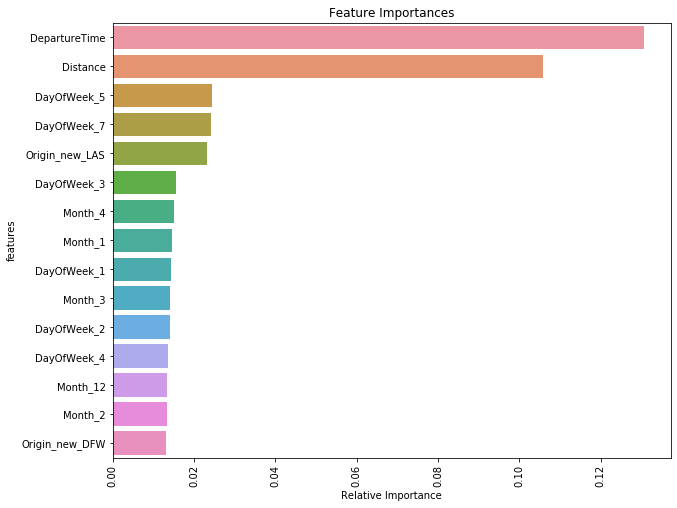

In [36]:
features = list(X.columns)
importances = rf.feature_importances_

feature_imp = pd.DataFrame({'features':features, 'importance':importances})
feature_imp.sort_values(by='importance', inplace=True, ascending=False)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
sns.barplot(y = feature_imp.features[0:15], x = feature_imp.importance[0:15], orient="h")
#plt.yticks(fontsize=16)
plt.xlabel('Relative Importance')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Cross Validation

rfc = ensemble.RandomForestRegressor()
cv = model_selection.cross_val_score(rfc, X, y, cv=5)
print(cv)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\catan\.conda\envs\catan

[-0.08010634 -0.04960124 -0.07243809 -0.15108599 -0.17816214]


In [38]:
rfc_small = ensemble.RandomForestClassifier()
rfc_small.fit(X_train.loc[:, ['Distance', 'DepartureTime']], y_train)
score_small = rfc_small.score(X_test.loc[:, ['Distance', 'DepartureTime']], y_test)
print(score_small)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.01980400163331972


## SVM

In [39]:
from sklearn import svm

# Creating SVC instance
svr = svm.SVR()
svr.fit(Xs_train, ys_train)
params = svr.get_params()

# Checking fit
scored = svr.score(Xs_test, ys_test)
y_hat = svr.predict(Xs_test)
print(scored)
#plt.scatter(ys_test, y_hat)
#plt.show()

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.027663342892452644


In [40]:
#Cross Validation
svr = svm.SVR()
cv = model_selection.cross_val_score(svr, X_scaled,y_scaled, cv=5)
print(cv)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-p

[-0.01939337 -0.02686885 -0.0309535  -0.03564669 -0.03616478]


## OLS

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000026821C30B48>>


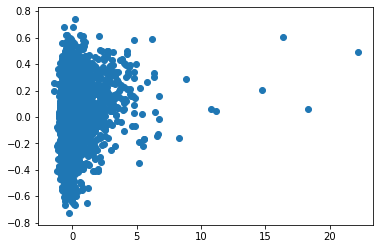

In [41]:
import statsmodels.api as sm
Xs_train['constant'] = 1
Xs_test['constant'] = 1

ols = sm.OLS(ys_train, Xs_train)
result = ols.fit()
print(result.summary)

y_hat = result.predict(Xs_test)
errors = ys_test - y_hat

plt.scatter(ys_test, y_hat)
plt.show()



In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.689
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.62e-89
Time:                        21:53:31   Log-Likelihood:                -20297.
No. Observations:               14692   AIC:                         4.088e+04
Df Residuals:                   14551   BIC:                         4.195e+04
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Distance            -0.0052      0.010  

In [43]:
X.head()

,Distance,Diverted,DepartureTime,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_new_ATL,Origin_new_AUS,Origin_new_BNA,Origin_new_BOS,Origin_new_BWI,Origin_new_CAE,Origin_new_CLE,Origin_new_CLT,Origin_new_CMH,Origin_new_CVG,Origin_new_DAL,Origin_new_DCA,Origin_new_DEN,Origin_new_DFW,Origin_new_DTW,Origin_new_EWR,Origin_new_FLL,Origin_new_HNL,Origin_new_HOU,Origin_new_IAD,Origin_new_IAH,Origin_new_IND,Origin_new_JFK,Origin_new_LAS,Origin_new_LAX,Origin_new_LGA,Origin_new_MCI,Origin_new_MCO,Origin_new_MDW,Origin_new_MEM,Origin_new_MIA,Origin_new_MKE,Origin_new_MSP,Origin_new_ONT,Origin_new_ORD,Origin_new_PBI,Origin_new_PDX,Origin_new_PHL,Origin_new_PHX,Origin_new_PIT,Origin_new_RDU,Origin_new_SAN,Origin_new_SAT,Origin_new_SEA,Origin_new_SFO,Origin_new_SJC,Origin_new_SJU,Origin_new_SLC,Origin_new_SNA,Origin_new_STL,Origin_new_TPA,Origin_new_other,Dest_new_ABQ,Dest_new_ATL,Dest_new_AUS,Dest_new_BNA,Dest_new_BOS,Dest_new_BWI,Dest_new_CLE,Dest_new_CLT,Dest_new_CVG,Dest_new_DAL,Dest_new_DCA,Dest_new_DEN,Dest_new_DFW,Dest_new_DTW,Dest_new_EWR,Dest_new_FLL,Dest_new_HOU,Dest_new_IAD,Dest_new_IAH,Dest_new_IND,Dest_new_JFK,Dest_new_LAS,Dest_new_LAX,Dest_new_LGA,Dest_new_MCI,Dest_new_MCO,Dest_new_MDW,Dest_new_MEM,Dest_new_MHT,Dest_new_MIA,Dest_new_MKE,Dest_new_MSP,Dest_new_MSY,Dest_new_OAK,Dest_new_OMA,Dest_new_ORD,Dest_new_PDX,Dest_new_PHL,Dest_new_PHX,Dest_new_RDU,Dest_new_RSW,Dest_new_SAN,Dest_new_SAT,Dest_new_SEA,Dest_new_SFO,Dest_new_SJC,Dest_new_SJU,Dest_new_SLC,Dest_new_SMF,Dest_new_STL,Dest_new_TPA,Dest_new_other
5590455,2457,0,892,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5046796,550,0,653,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71525,448,0,660,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1130850,1249,0,4870,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
547544,301,0,850,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[]

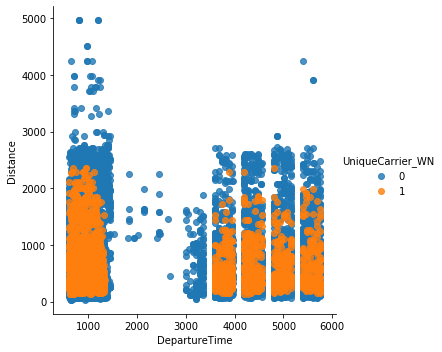

In [44]:
sns.lmplot('DepartureTime', 'Distance', data=X, hue = 'UniqueCarrier_WN', fit_reg=False)
plt.plot()

## Conclusion

The model did poor job in predicting late flight arrivals. The finding is still interesting as there is no evidence that any airport or airline is systematically late. If we want to improve the model accuracy, we need more independent variable with more predictive power. 
